In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
sns.set_style('darkgrid')

In [77]:
credit = pd.read_csv("C:\\Users\\satys\\OneDrive\\Desktop\\Deault of credit card detection\\Default of credit card clients.csv")

Representing the data

In [78]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [79]:
credit.shape

(30000, 25)

In [80]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [81]:
credit.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Now in data cleaning we are removing first column named ID since it is reduntant in this analysis and then we removed duplicate values since they dont help in making good predicting models and may cause overfitting

In [82]:
credit = credit.drop(["ID"], axis = 1)


In [83]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [84]:
credit.duplicated().sum()

35

In [85]:
credit = credit.drop_duplicates()

In [86]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [87]:
credit.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Plot to check relationship between number of people and differet features

c:\Users\satys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


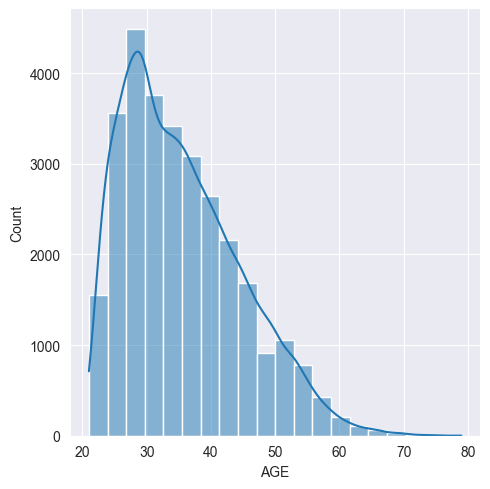

In [88]:
sns.displot(credit['AGE'], bins = 20, kde = True)

In [89]:
sns.countplot(x = 'EDUCATION', data= dcredit, palette = 'pastel')

NameError: name 'dcredit' is not defined

In [ ]:
credit['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

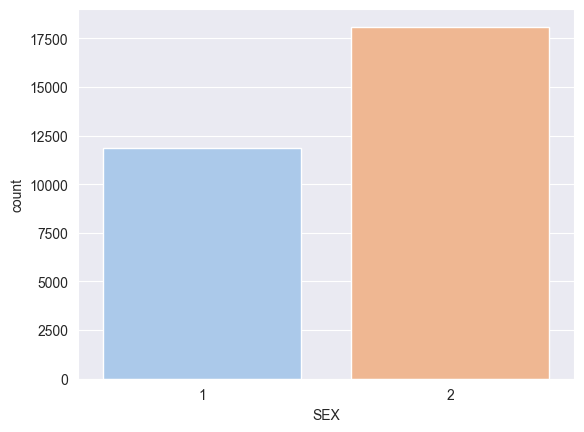

In [ ]:
sns.countplot(x = 'SEX', data= credit, palette = 'pastel')

In [ ]:
credit['SEX'].value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

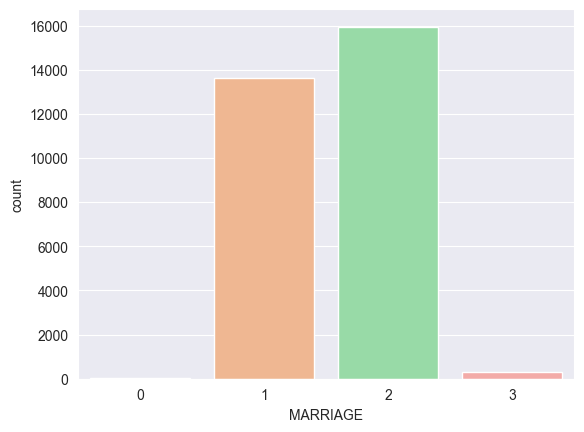

In [ ]:
sns.countplot(x = 'MARRIAGE', data= credit, palette = 'pastel')

In [ ]:
credit['MARRIAGE'].value_counts()

MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

c:\Users\satys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


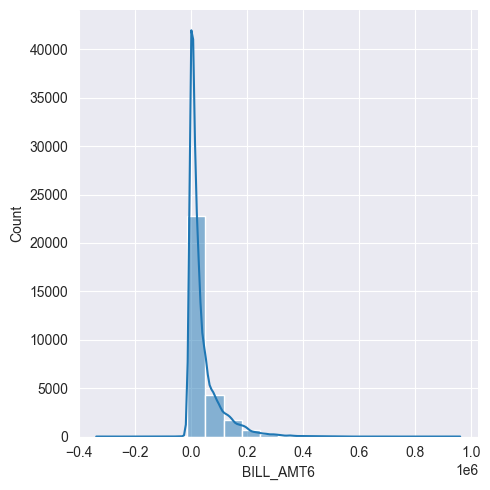

In [ ]:
sns.displot(credit['BILL_AMT6'], bins = 20, kde = True)

c:\Users\satys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


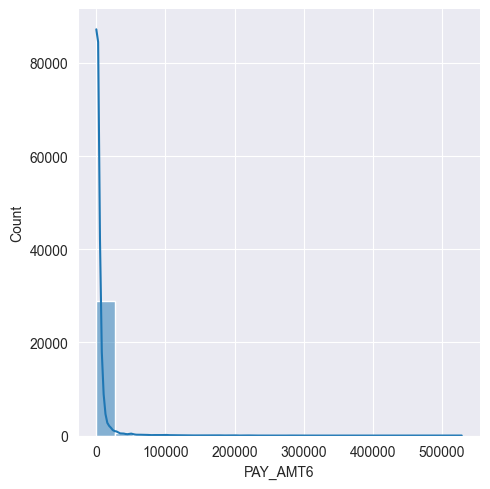

In [ ]:
sns.displot(credit['PAY_AMT6'], bins = 20, kde = True)

Correlation plot 

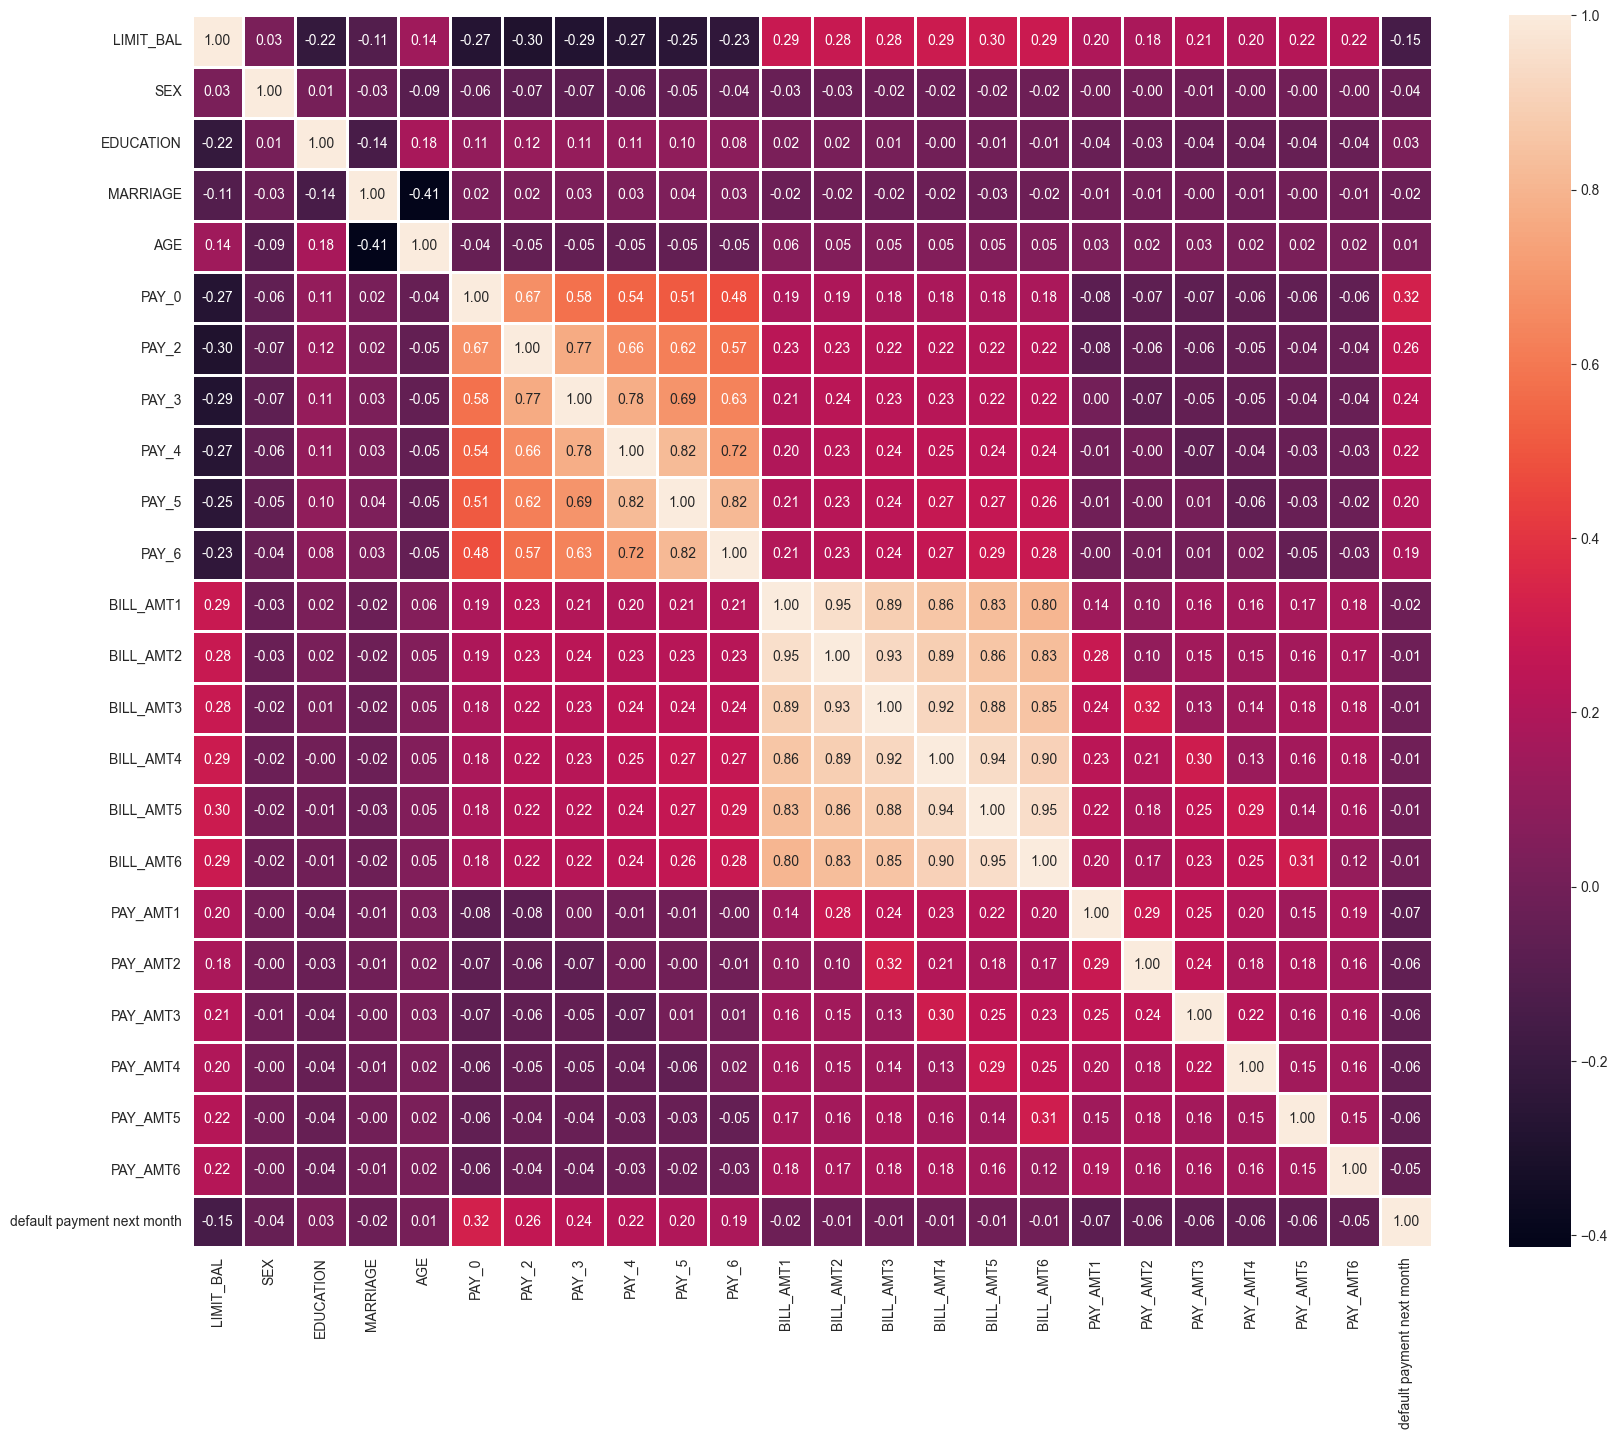

In [ ]:
corr_matrix=credit.corr()
fig,ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=1,
               fmt=".2f"
              )

In [ ]:
# Define a function to convert continuous values to categories
def classify_default_or_not(nextpayment):
    if nextpayment == 1:
        return "Default"
    else:
        return "Not default"

# Apply the function to create a new categorical column
credit["Defaultonnextpayment"] = credit["default payment next month"].apply(classify_default_or_not)

<Axes: title={'center': 'Default and not default'}, xlabel='Defaultonnextpayment'>

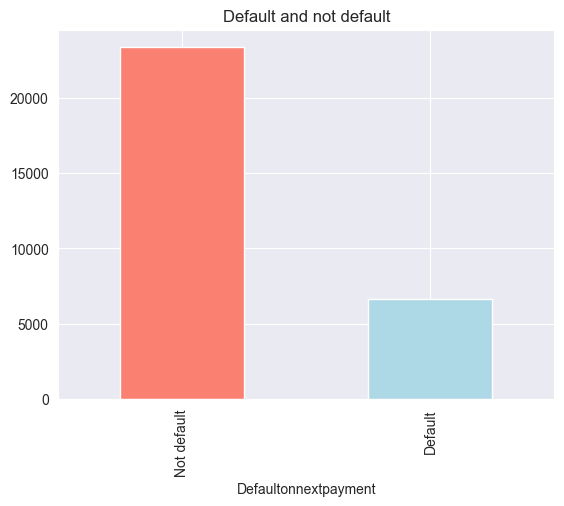

In [ ]:
credit['Defaultonnextpayment'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Default and not default")

Box Plots to remove outliers

<Axes: xlabel='LIMIT_BAL'>

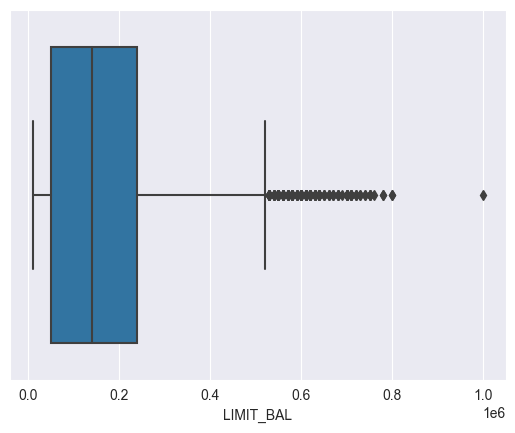

In [ ]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

<Axes: xlabel='PAY_AMT6'>

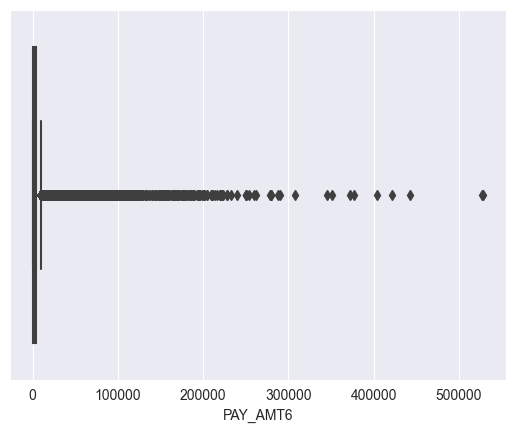

In [ ]:
sns.boxplot(x = 'PAY_AMT6', data = credit)


There are few people who have high income.Those guys will be able to pay since they have hugh amount in there account.Lets remove them

In [ ]:
credit = credit[(credit['LIMIT_BAL'] <= 400000) & (credit['PAY_AMT6'] <= 50000)]

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27771 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   27771 non-null  int64 
 1   SEX                         27771 non-null  int64 
 2   EDUCATION                   27771 non-null  int64 
 3   MARRIAGE                    27771 non-null  int64 
 4   AGE                         27771 non-null  int64 
 5   PAY_0                       27771 non-null  int64 
 6   PAY_2                       27771 non-null  int64 
 7   PAY_3                       27771 non-null  int64 
 8   PAY_4                       27771 non-null  int64 
 9   PAY_5                       27771 non-null  int64 
 10  PAY_6                       27771 non-null  int64 
 11  BILL_AMT1                   27771 non-null  int64 
 12  BILL_AMT2                   27771 non-null  int64 
 13  BILL_AMT3                   27771 non-null  int64 


<Axes: xlabel='LIMIT_BAL'>

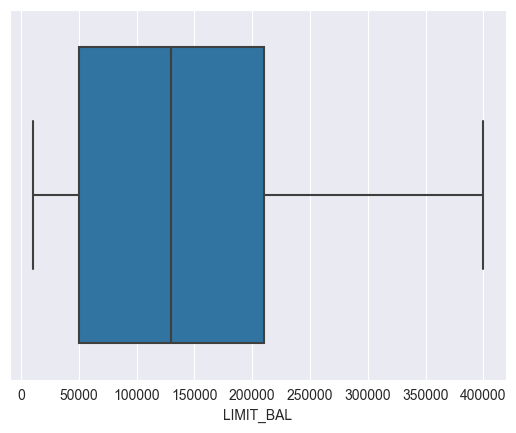

In [ ]:
sns.boxplot(x = 'LIMIT_BAL', data = credit)

Standardizing the data

In [90]:
scaler = StandardScaler()
scaler.fit(credit.drop('default payment next month', axis = 1))


StandardScaler()

In [91]:
scaled_data = scaler.transform(credit.drop('default payment next month', axis = 1))

In [92]:
credit_feat = pd.DataFrame(scaled_data, columns = credit.columns[:-1])
credit_feat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136285,0.810153,0.185186,-1.057260,-1.246078,1.795105,1.782037,-0.698752,-0.668642,-1.532847,...,-0.668571,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562
1,-0.365619,0.810153,0.185186,0.858493,-1.029141,-0.875185,1.782037,0.137468,0.187408,0.233623,...,-0.639841,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119
2,-0.596819,0.810153,0.185186,0.858493,-0.161397,0.014912,0.110218,0.137468,0.187408,0.233623,...,-0.483045,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453
3,-0.905085,0.810153,0.185186,-1.057260,0.164007,0.014912,0.110218,0.137468,0.187408,0.233623,...,0.032047,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340
4,-0.905085,-1.234334,0.185186,-1.057260,2.333368,-0.875185,0.110218,-0.698752,0.187408,0.233623,...,-0.161927,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388


Splitting standardized data into train vs test

In [93]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data, credit['default payment next month'],test_size=0.2,random_state=42)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [95]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [96]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.812406
[Logistic Regression] test data accuracy is : 0.807442
[Decision Tree] training data accuracy is : 0.999249
[Decision Tree] test data accuracy is : 0.728517
[KNN] training data accuracy is : 0.864133
[KNN] test data accuracy is : 0.772067
[SVM] training data accuracy is : 0.810654
[SVM] test data accuracy is : 0.804605
[Random Forest] training data accuracy is : 0.999249
[Random Forest] test data accuracy is : 0.814784
[Naive Bayes] training data accuracy is : 0.734774
[Naive Bayes] test data accuracy is : 0.743534


In [97]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8074420156849658,
 'KNN classifier': 0.7720674119806441,
 'Support Vector Machine': 0.8046053729350909,
 'Random forest': 0.8147839145669948,
 'Decision tree': 0.7285166027031537,
 'Naive Bayes': 0.7435341231436676}

Performing neural network

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
model = Sequential()
model.add(Dense(100,  activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

To prevent overfitting early stop is created

In [100]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [101]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
750/750 [==============================] - 7s 6ms/step - loss: 0.5201 - val_loss: 0.4618
Epoch 2/150
750/750 [==============================] - 5s 7ms/step - loss: 0.4766 - val_loss: 0.4467
Epoch 3/150
750/750 [==============================] - 6s 8ms/step - loss: 0.4670 - val_loss: 0.4487
Epoch 4/150
750/750 [==============================] - 4s 5ms/step - loss: 0.4601 - val_loss: 0.4457
Epoch 5/150
750/750 [==============================] - 4s 5ms/step - loss: 0.4588 - val_loss: 0.4413
Epoch 6/150
750/750 [==============================] - 6s 7ms/step - loss: 0.4556 - val_loss: 0.4392
Epoch 7/150
750/750 [==============================] - 4s 5ms/step - loss: 0.4541 - val_loss: 0.4398
Epoch 8/150
750/750 [==============================] - 3s 4ms/step - loss: 0.4511 - val_loss: 0.4356
Epoch 9/150
750/750 [==============================] - 6s 7ms/step - loss: 0.4506 - val_loss: 0.4376
Epoch 10/150
750/750 [==============================] - 3s 4ms/step - loss: 0.4489 - val_lo

In [102]:
neural_predict = (model.predict(X_test) > 0.5).astype("int32")

188/188 [==============================] - 1s 3ms/step


In [107]:
print(confusion_matrix(y_test, neural_predict))
print('\n')
print(classification_report(y_test, neural_predict))

[[4508  165]
 [ 947  373]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.28      0.40      1320

    accuracy                           0.81      5993
   macro avg       0.76      0.62      0.65      5993
weighted avg       0.80      0.81      0.78      5993



Among all these models neural network and random forest shows best accuracy and logistic regression is not far behind.